In [1]:
#importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset
data=pd.read_csv('/content/sample_data/titanic_dataset.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

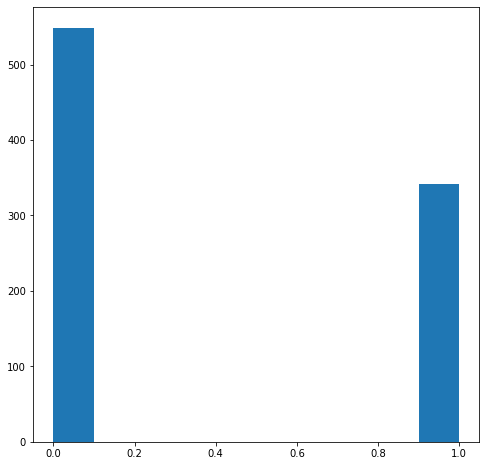

In [6]:
plt.figure(figsize=(8,8))
plt.hist(data['Survived'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


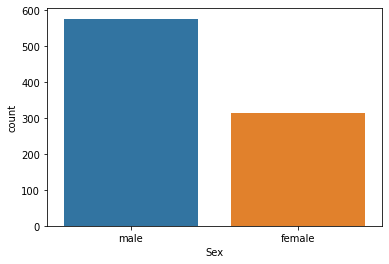

In [7]:
sns.countplot(data['Sex'])

# Preprocessing

In [8]:
#checking missing values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 The column ‘Embarked' has only 2 missing values. So, we can drop those two rows.

In [9]:
data.shape

(891, 12)

In [10]:
data.dropna(subset=['Embarked'],inplace=True)
data.shape

(889, 12)

Now the missing values in 'Embarked' column is removed.

In [11]:
#filling missing values in Age using median
data['Age']=data['Age'].replace(np.NaN,data['Age'].median())

In [12]:
#filling missing values in Cabin
data['Cabin']=data['Cabin'].fillna(data['Cabin'].ffill())
data=data.fillna({'Cabin':'C85'})

In [13]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Now all the missing values are filled.

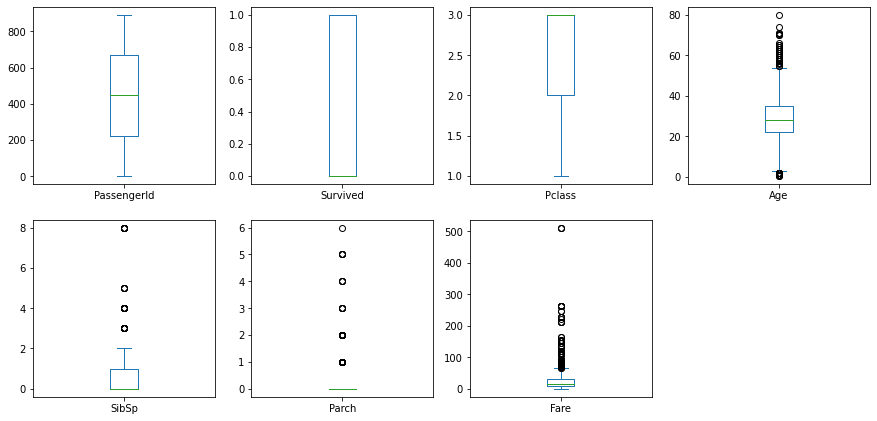

In [14]:
#checking for outliers
data.plot(kind ='box',subplots =True,layout =(4,4),figsize = (15,15))
plt.show()

In [15]:
#Handling outliers in Age
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['Age']=np.where(data['Age']>upper_whisker,upper_whisker,np.where(data['Age']<lower_whisker,lower_whisker,data['Age']))

In [16]:
#Handling outliers in SibSp
Q1 = data['SibSp'].quantile(0.25)
Q3 = data['SibSp'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['SibSp']=np.where(data['SibSp']>upper_whisker,upper_whisker,np.where(data['SibSp']<lower_whisker,lower_whisker,data['SibSp']))

In [17]:
#Handling outliers in Fare
Q1 = data['Fare'].quantile(0.25)
Q3 = data['Fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['Fare']=np.where(data['Fare']>upper_whisker,upper_whisker,np.where(data['Fare']<lower_whisker,lower_whisker,data['Fare']))

In [18]:
#Handling outliers in Parch
Q1 = data['Parch'].quantile(0.25)
Q3 = data['Parch'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['Parch']=np.where(data['Parch']>upper_whisker,upper_whisker,np.where(data['Parch']<lower_whisker,lower_whisker,data['Parch']))

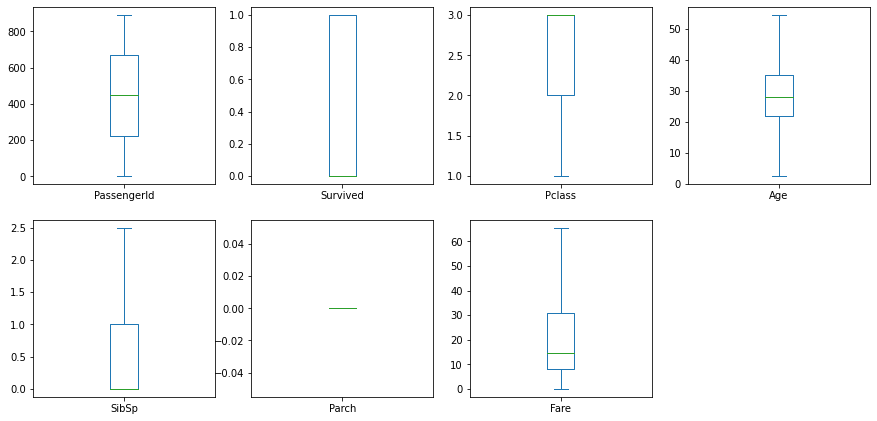

In [19]:
data.plot(kind ='box',subplots =True,layout =(4,4),figsize = (15,15))
plt.show()

Now all the outliers in the dataset is cleared.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


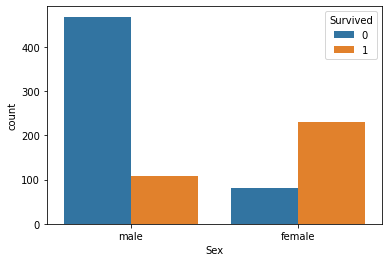

In [20]:
sns.countplot('Sex',hue='Survived',data=data)

Number of females survived is more than than that of males.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


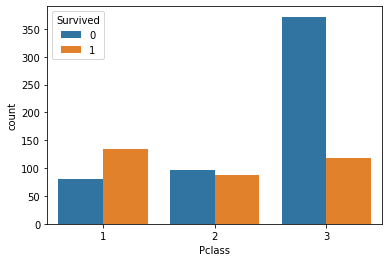

In [21]:
sns.countplot('Pclass',hue='Survived',data=data)

 1st Pclass passenger survived more than 2nd and 3rd Pclass.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


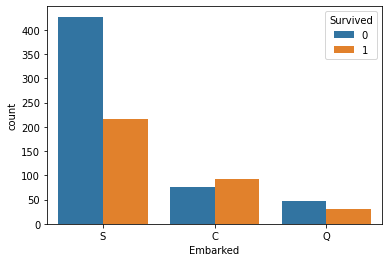

In [22]:
sns.countplot('Embarked',hue='Survived',data=data)

 S port of Embarkation Survived more than C and Q but the number of non survived is also more tha C and Q

In [23]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [24]:
data.shape

(889, 12)

In [25]:
data.replace({'Sex':{'female':0,'male':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)
data.replace({'Sex':{'female':0,'male':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [28]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1.0,0.0,A/5 21171,7.2500,C85,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1.0,0.0,PC 17599,65.6563,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0.0,0.0,STON/O2. 3101282,7.9250,C85,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1.0,0.0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0.0,0.0,373450,8.0500,C123,0


In [29]:
#splitting dataset to target & columns
x=data.drop(['Survived','PassengerId','Name','Ticket','Cabin'],axis=1)
y=data['Survived']

In [30]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [31]:
x.shape

(889, 7)

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
x_train.shape

(711, 7)

# Building models

In [35]:
#Logistic Regression model
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score,f1_score
print('Accuracy of Logistic Regression model is',accuracy_score(y_test,y_pred))
print('f1 score of Logistic Regression model is',f1_score(y_test,y_pred))

Accuracy of Logistic Regression model is 0.7808988764044944
f1 score of Logistic Regression model is 0.7310344827586206


In [37]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
best_Kvalue = 0
best_score = 0
for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    if knn.score(x_test, y_test) > best_score:
        best_score = knn.score(x_train, y_train)
        best_Kvalue = k
print("Test Accuracy:",accuracy_score(y_test,y_pred))

Test Accuracy: 0.7808988764044944


In [38]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)
print('Accuracy on decision tree model is:',accuracy_score(y_test,y_pred))

Accuracy on decision tree model is: 0.7696629213483146


In [39]:
#SVM
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)
print('Accuracy using linear svm is:',accuracy_score(y_test,y_pred))

Accuracy using linear svm is: 0.797752808988764


In [40]:
#polynomial SVM
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)
y_pred=svm_poly.predict(x_test)
print('Accuracy using polynomial svm is:',accuracy_score(y_test,y_pred))

Accuracy using polynomial svm is: 0.8089887640449438


In [41]:
#radial SVM
svm_radial=SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
y_pred=svm_poly.predict(x_test)
print('Accuracy using radial svm is:',accuracy_score(y_test,y_pred))

Accuracy using radial svm is: 0.8089887640449438


In [42]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
f1_score(y_test,y_pred)

0.7346938775510203

In [43]:
#Gradient Boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
f1_score(y_test,y_pred)

0.7575757575757576

In [44]:
#Fitting gaussian Naive Bayes 
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred=nb.predict(x_test)

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.7640449438202247

In [46]:
#Fitting Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_train, y_train)
y_pred=bnb.predict(x_test)

In [47]:
cm=confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.7640449438202247

SVM model is having higher accuracy comparing to other models.

In [48]:
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1])